In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle
from keras.models import load_model

In [2]:
os.getcwd()

'C:\\Users\\altoz_aaxmwbk\\Documents\\Projects\\HASSIO_Facial_Recognition\\model'

In [3]:
DATA_DIR = '../train/'
CATEGORIES = ['sydney', 'zach']

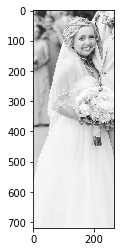

In [4]:
for cat in CATEGORIES:
    path = os.path.join(DATA_DIR, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(719, 269)


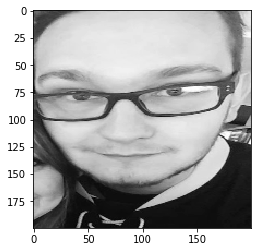

In [6]:
IMG_SIZE = 200
for cat in CATEGORIES:
    path = os.path.join(DATA_DIR, cat)
    class_num = CATEGORIES.index(cat)
    
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except:
            pass
            
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_data = []

In [8]:
def create_training_data(IMG_SIZE=200):
    for cat in CATEGORIES:
        path = os.path.join(DATA_DIR, cat)
        class_num = CATEGORIES.index(cat)

        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

In [9]:
create_training_data()

In [10]:
random.shuffle(training_data)

In [11]:
# cool, now we have mixed up the dataset! Remeber 0=sydney, 1=zach

for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
0
1
0
0
0


In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out_y = open("y.pickle", "wb")
pickle.dump(y, pickle_out_y)
pickle_out_y.close()

In [38]:
model = load_model('model.h5')

In [55]:
img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [75]:
sydney_path = '../train/sydney/'
zach_path = '../train/zach/'

img = 'sydney_04.jpg'

os.path.join(zach_path, img)

'../train/zach/sydney_04.jpg'

In [76]:
img_array = cv2.imread(os.path.join(sydney_path, img), cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

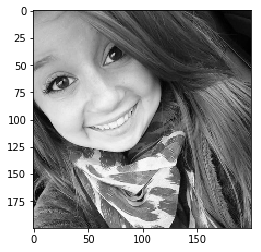

In [77]:
plt.imshow(new_array, cmap="gray")
plt.show()

In [78]:
new_array = new_array.reshape([-1,200,200,1])

In [79]:
model.predict(new_array)

array([[0.]], dtype=float32)

In [80]:
int(pred[0][0])

0

In [81]:
def make_prediction(person, img):
    if person.lower() == 'zach':
        path = zach_path
    else:
        path = sydney_path
    
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap="gray")
    plt.show()
    new_array = new_array.reshape([-1,200,200,1])
    
    pred = model.predict(new_array)
    if int(pred[0][0]) == 0:
        return 'Sydney'
    else:
        return 'Zach'

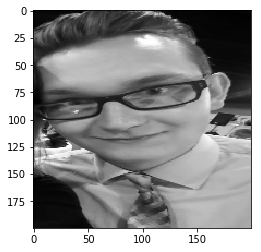

prediction is: Zach


In [98]:
prediction = make_prediction('zach', 'zach_31.jpg')
print(f'prediction is: {prediction}')